In [113]:
#!pip instal pandas-gbq
from pandas.io import gbq
import pandas as pd

In [114]:
query=""" SELECT * FROM `my-project-egen.egen_bigquery.flight` """

In [115]:
df= gbq.read_gbq(query,project_id='my-project-egen')

Downloading: 100%|█████████████████████████████████████████████████████████████| 1397/1397 [00:00<00:00, 2737.64rows/s]


In [116]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,date
0,2015,1,1,4,AA,2,N795AA,LAX,JFK,900,...,271.0,2475,1643.0,8.0,1735,1651.0,-44.0,0,0,2015-1-1
1,2015,3,8,7,AA,1,N792AA,JFK,LAX,900,...,352.0,2475,1158.0,13.0,1241,1211.0,-30.0,0,0,2015-3-8
2,2015,3,10,2,AA,2,N798AA,LAX,JFK,900,...,299.0,2475,1720.0,11.0,1739,1731.0,-8.0,0,0,2015-3-10
3,2015,1,2,5,AA,3,N799AA,JFK,LAX,1230,...,339.0,2475,1515.0,5.0,1550,1520.0,-30.0,0,0,2015-1-2
4,2015,1,5,1,AA,3,N786AA,JFK,LAX,1230,...,349.0,2475,1544.0,10.0,1550,1554.0,4.0,0,0,2015-1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,2015,1,31,6,WN,2,N206WN,IND,RSW,1135,...,117.0,945,1341.0,3.0,1405,1344.0,-21.0,0,0,2015-1-31
1393,2015,2,7,6,WN,2,N450WN,IND,RSW,1135,...,121.0,945,1339.0,4.0,1405,1343.0,-22.0,0,0,2015-2-7
1394,2015,1,1,4,WN,2787,N910WN,PIT,FLL,600,...,132.0,994,820.0,4.0,850,824.0,-26.0,0,0,2015-1-1
1395,2015,3,7,6,WN,2,N457WN,MDW,SAT,1735,...,151.0,1036,2027.0,4.0,2025,2031.0,6.0,0,0,2015-3-7


In [117]:

df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME           int64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
date                    object
dtype: object

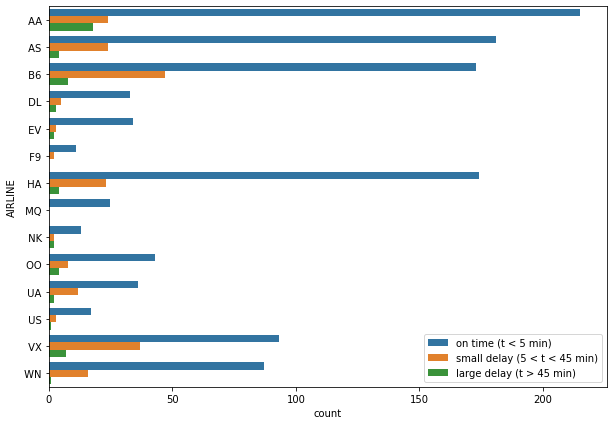

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
df['DELAY_LEVEL'] = df['DEPARTURE_DELAY'].apply(delay_type)
#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=df)

# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

In [121]:
df = df.drop('AIRLINE', axis=1)
df = df.drop('ORIGIN_AIRPORT',axis=1)
df = df.drop('DESTINATION_AIRPORT',axis=1)
df = df.drop('TAIL_NUMBER',axis=1)
df = df.drop('YEAR',axis=1)
df = df.drop('MONTH',axis=1)
df = df.drop('DAY',axis=1)
df = df.drop('DAY_OF_WEEK',axis=1)
df = df.drop('date',axis=1)

In [122]:
df.isnull().sum()

FLIGHT_NUMBER           0
SCHEDULED_DEPARTURE     0
DEPARTURE_TIME         57
DEPARTURE_DELAY        57
TAXI_OUT               58
WHEELS_OFF             58
SCHEDULED_TIME          0
ELAPSED_TIME           58
AIR_TIME               58
DISTANCE                0
WHEELS_ON              58
TAXI_IN                58
SCHEDULED_ARRIVAL       0
ARRIVAL_TIME           58
ARRIVAL_DELAY          58
DIVERTED                0
CANCELLED               0
DELAY_LEVEL             0
dtype: int64

In [123]:
df=df.interpolate()




In [124]:
df.dtypes

FLIGHT_NUMBER            int64
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME           int64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
DELAY_LEVEL              int64
dtype: object

In [125]:
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].astype(int)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].astype(int)
df['TAXI_OUT'] = df['TAXI_OUT'].astype(int)
df['WHEELS_OFF'] = df['WHEELS_OFF'].astype(int)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].astype(int)
df['AIR_TIME'] = df['AIR_TIME'].astype(int)
df['WHEELS_ON'] = df['WHEELS_ON'].astype(int)
df['TAXI_IN'] = df['TAXI_IN'].astype(int)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].astype(int)
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].astype(int)

In [126]:
df.dtypes

FLIGHT_NUMBER          int64
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         int32
DEPARTURE_DELAY        int32
TAXI_OUT               int32
WHEELS_OFF             int32
SCHEDULED_TIME         int64
ELAPSED_TIME           int32
AIR_TIME               int32
DISTANCE               int64
WHEELS_ON              int32
TAXI_IN                int32
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           int32
ARRIVAL_DELAY          int32
DIVERTED               int64
CANCELLED              int64
DELAY_LEVEL            int64
dtype: object

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("DEPARTURE_DELAY",axis=1), df["DEPARTURE_DELAY"], test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [130]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train,y_train)

In [132]:
predicted = linreg.predict(X_test)
linreg.score(X_test,y_test)

0.9272641041501647

In [133]:
predicted

array([ 1.60733026e+01, -1.35077469e+01, -6.00570170e+00, -4.84910110e+00,
       -6.19969038e+00, -7.32427551e+00, -1.03012814e+01, -4.03590566e+00,
        1.19194391e+01, -3.24916187e+01, -6.00647553e+00, -2.27811677e+00,
       -6.01599259e+00,  1.67143161e+01, -3.03532978e-01,  1.98168294e+01,
       -1.05365148e+01, -1.92572775e+00,  1.74548671e+01,  3.37151841e+00,
       -7.15983676e+00, -1.42436222e+01, -1.30465522e+01,  5.40796147e+00,
        1.00750568e+01, -1.75053013e+01, -3.36661620e+00, -7.40011348e+00,
        4.36915153e+00, -1.54190542e+01, -1.15344031e+01, -1.66167107e+00,
       -6.47908038e+00, -1.20853631e+01, -6.13663347e+00, -5.85159640e+00,
       -1.96386427e+00, -1.71002566e+00, -7.70030681e+00, -1.70598936e+00,
        7.95571402e+00, -2.56557533e+01,  1.73164468e+01,  3.10172204e+01,
       -1.26353194e+01, -6.80650117e+00, -4.69086143e+00, -3.55723145e+00,
        7.06884706e+00, -2.37637270e+00, -8.17954972e+00,  1.57237273e+01,
        3.53122798e+01, -